#Winequality Red
https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

data csv 파일 불러오기

In [186]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/week6/winequality-red.csv")

###1. 모델 디자인
   - 3 hidden layers, neuron = 512
   - adam Optimizer, MSE loss
   - input : 11개 label
   - output : 1개 (quality)

In [187]:
# from tensorflow.keras import models, layers, optimizers, losses, metrics

# model = models.Sequential()
# model.add(layers.Dense(512, activation='relu', input_shape=(data.shape[1]-1,)))
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dense(1))

# model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
#               loss=losses.MeanSquaredError(),
#               metrics=['mae'])

**Problem #3 전용**

* L1, L2 적용
* prediction값의 편향이 심한듯한 느낌


In [188]:
from tensorflow.keras import models, layers, optimizers, losses, metrics, \
regularizers

model = models.Sequential()
model.add(layers.Dense(512, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),\
                       activation='relu', input_shape=(data.shape[1]-1,)))
model.add(layers.Dense(512, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),\
                       activation='relu'))
model.add(layers.Dense(512, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),\
                       activation='relu'))
model.add(layers.Dense(1, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))

model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss=losses.MeanSquaredError(),
              metrics=['mae'])

###2. 데이터 전처리 (Data preparation)
  - train set = 0 ~ 1000
  - test set = 1000 ~
  - min-max Normalization => 0~1 (MinMaxScaler)

In [189]:
#input data(x_data) 와 out data(y_data) 분리 작업
x_data = {}
y_data = {}
for label in data:
  if label != 'quality':
    x_data[label] = data[label]
  else:
    y_data[label] = data[label]

x_data = pd.DataFrame(x_data)
y_data = pd.DataFrame(y_data)

#train data 와 test data 분리 작업
x_train, y_train = x_data.loc[:999], y_data.loc[:999]
x_test, y_test = x_data.loc[1000:], y_data.loc[1000:]

#normalization 작업
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
y_train = scaler.fit_transform(y_train)
x_test = scaler.fit_transform(x_test)
y_test = scaler.fit_transform(y_test)

###3. 학습
  - validation: 20% hold out CV
  - learning with 500 epochs (batch size: default)

In [190]:
from tensorflow.keras.callbacks import EarlyStopping

history = model.fit(x_train, y_train, epochs=500, validation_split=0.2).history
train_loss, train_mae = history["loss"][-1], history["mae"][-1]
val_loss, val_mae = history["val_loss"][-1], history["val_mae"][-1]

25/25 [==============================] - 0s 16ms/step - loss: 0.0893 - mae: 0.1310 - val_loss: 0.1010 - val_mae: 0.1603
Epoch 497/500
25/25 [==============================] - 0s 16ms/step - loss: 0.0893 - mae: 0.1306 - val_loss: 0.1014 - val_mae: 0.1608
Epoch 498/500
25/25 [==============================] - 0s 18ms/step - loss: 0.0893 - mae: 0.1309 - val_loss: 0.1011 - val_mae: 0.1601
Epoch 499/500
25/25 [==============================] - 0s 18ms/step - loss: 0.0893 - mae: 0.1310 - val_loss: 0.1011 - val_mae: 0.1602
Epoch 500/500
25/25 [==============================] - 0s 17ms/step - loss: 0.0893 - mae: 0.1308 - val_loss: 0.1010 - val_mae: 0.1611


###4. 평가
  - training, validation, test set 의 최종 MAE
  - training, validation, test set 의 MAE learning curve
  - Compare the prediction results of the first 10 samples of the test set, with the true targets. 

In [191]:
test_loss, test_mae = model.evaluate(x_test, y_test)

19/19 [==============================] - 0s 5ms/step - loss: 0.0936 - mae: 0.1408


**Problem** #2 - 1. learning curve

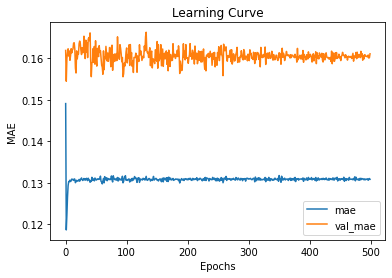

In [192]:
import matplotlib.pyplot as plt 

plt.title("Learning Curve")
plt.plot(history["mae"])
plt.plot(history["val_mae"])
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend(["mae", "val_mae"])
plt.show()

**Problem** #2 - 2 

In [193]:
print("train_mae:", train_mae)
print("val_mae:", val_mae)
print("test_mae:", test_mae)

train_mae: 0.1308354288339615
val_mae: 0.1610962301492691
test_mae: 0.14082340896129608


**Problem** #2 - 3 

In [194]:
predictions = model.predict(x_test)[:10]
print("predictions:\n", predictions.reshape((len(predictions), )))
answer = y_test[:10]
print("answer:\n", answer.reshape((len(answer), )))
compare = abs(answer - predictions)
print("compare:\n", compare.reshape((len(compare), )))

predictions:
 [0.5045189 0.5045189 0.5045189 0.5045189 0.5045189 0.5045189 0.5045189
 0.5045189 0.5045189 0.5045189]
answer:
 [0.8 0.8 0.8 0.8 0.4 0.8 0.8 0.8 0.8 0.4]
compare:
 [0.29548107 0.29548107 0.29548107 0.29548107 0.10451893 0.29548107
 0.29548107 0.29548107 0.29548107 0.10451893]
